# Data Preprocessing

## Library Imports

In [212]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


## Data Imports

In [214]:
# sns.get_dataset_names()

In [215]:
iris = sns.load_dataset('iris')

## EDA (Exploratory Data Analysis)

In [217]:
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [305]:
iris.tail(10)

,sepal_length,sepal_width,petal_length,petal_width,species
140,6.7,3.1,5.6,2.4,virginica
141,6.9,3.1,5.1,2.3,virginica
142,5.8,2.7,5.1,1.9,virginica
143,6.8,3.2,5.9,2.3,virginica
144,6.7,3.3,5.7,2.5,virginica
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [219]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [220]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [221]:
print(iris.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [301]:
iris.shape

(150, 5)

sns.scatterplot(x='sepal_length', y='species', data=iris)

plt.show()

## Handling Missing Value

In [225]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Feature Engineering

In [227]:
features = iris.columns[:-1] 

In [228]:
iris.index

RangeIndex(start=0, stop=150, step=1)

## Handling Outlier

## Data Visualization

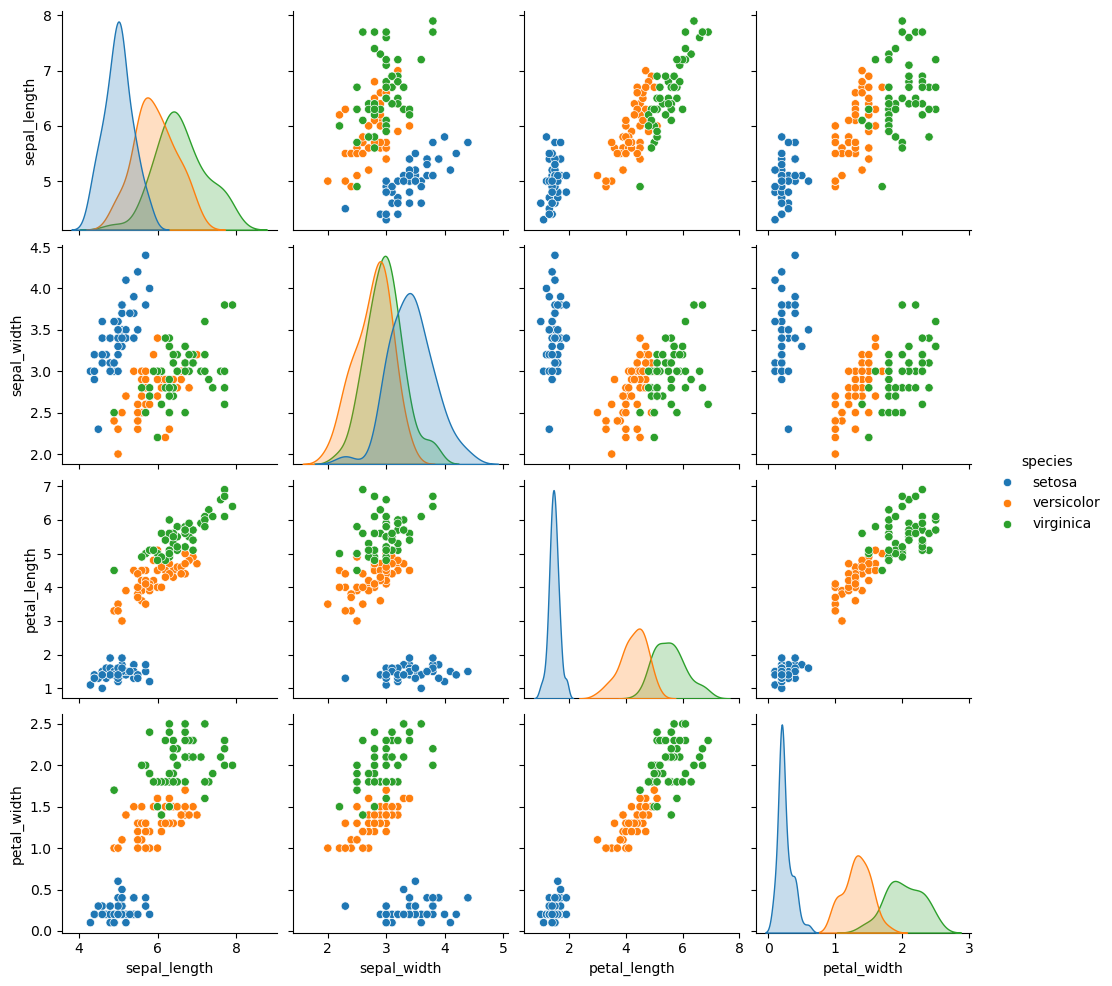

In [231]:
sns.pairplot(iris,hue='species')
plt.show()

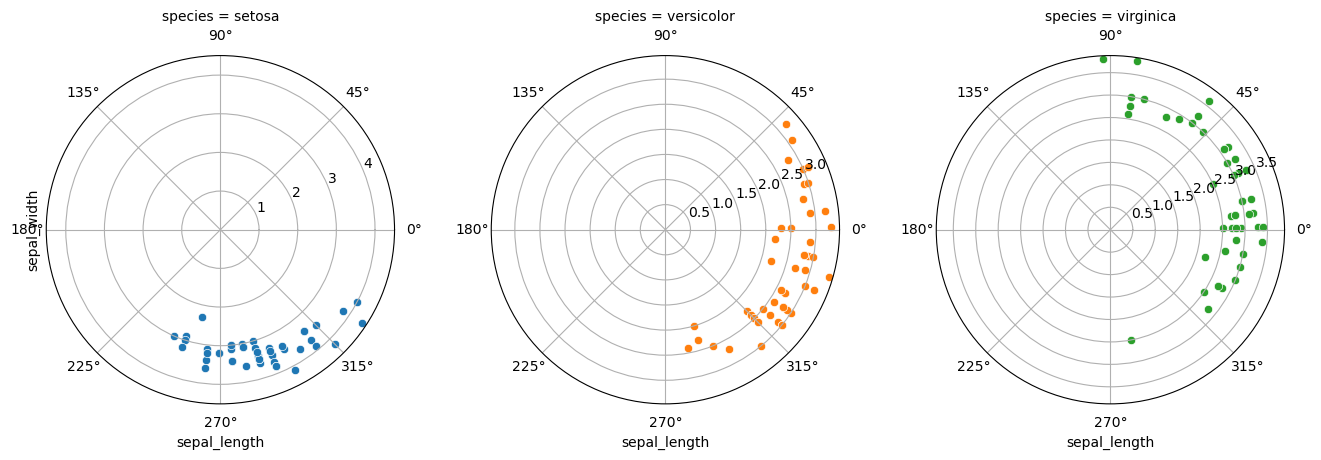

In [232]:
g = sns.FacetGrid(iris, col='species', hue='species', subplot_kws=dict(projection='polar'), 
                  height=4.5, sharex=False, sharey=False, despine=False)
g.map(sns.scatterplot, iris.columns[0], iris.columns[1])
plt.show()

# Model Building

## Train Test Split 

In [235]:
X=iris.drop('species',axis=1)
y=iris['species']

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [237]:
len(X_test)

30

In [238]:
len(X_train)

120

## Model Initalization

In [240]:
knn=KNeighborsClassifier(n_neighbors=3, p=2, metric='minkowski')
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [241]:
best_model = KNeighborsClassifier(n_neighbors=3, p=2, metric='minkowski')
best_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [242]:
knn.score(X_test, y_test)

0.9666666666666667

## Model Training

In [244]:
y_pred=knn.predict(X_test)
cm=confusion_matrix(y_test,y_pred)

In [245]:
print(cm)

[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


In [246]:
y_pred = best_model.predict(X_test)

In [247]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## Hyper Parameter Tuining

In [249]:
param_grid = {
    'n_neighbors': [3, 5, 7],
    'p': [1, 2],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}

In [250]:
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_knn = grid_search.best_estimator_

# Evaluation and Result

In [252]:
y_pred=knn.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [253]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [292]:
print(y_pred)

['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'virginica' 'virginica'
 'setosa' 'virginica' 'virginica' 'virginica' 'versicolor' 'setosa'
 'virginica' 'virginica' 'versicolor' 'versicolor' 'versicolor']


In [294]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


## Error

## Research